In [1]:
#######################################################
#######################################################
##
## This notebook creates a violin plot 
## showing the reuse distributions 
## of samples in INSDC and GEO.
##
#######################################################
#######################################################

In [17]:
# load required modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns

In [18]:
# import the data
dfSRA = pd.read_csv('../data_tables/sraReuseTable.csv')
dfGEO = pd.read_csv('../data_tables/geoReuseTable.csv')

In [19]:
dfSRA.head()

,DRA0000000,1
0,DRA000001,2
1,DRA000010,1
2,DRA000017,0
3,DRA000018,0
4,DRA000019,0


In [20]:
dfGEO.head()

,GDE000000,0
0,GDE00259,0
1,GDE00613,0
2,GDE00900,0
3,GDE01,1
4,GDE010000,0


In [21]:
## CLEAN THE DATA ##

# add headers
dfSRA.columns = ['accession', 'reuseCount']
dfGEO.columns = ['accession', 'reuseCount']

# add a tag column to separate by repository
dfSRA['tag'] = 'INSDC'
dfGEO['tag'] = 'GEO'

# merge both dataframes into one large dataframe
df = dfSRA.append(dfGEO, ignore_index=True)

In [22]:
df.head()

,accession,reuseCount,tag
0,DRA000001,2,INSDC
1,DRA000010,1,INSDC
2,DRA000017,0,INSDC
3,DRA000018,0,INSDC
4,DRA000019,0,INSDC


In [32]:
df = df[df.reuseCount > 0] #ask Niko why we have 0's . Is this ids which were not found in 2M papers we have parced?
df = df[df.reuseCount < 50]

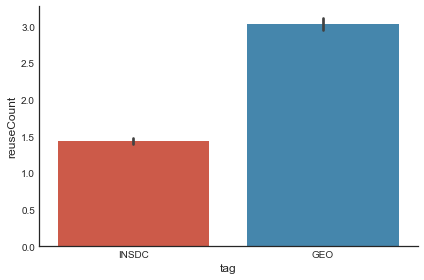

In [33]:
sns.catplot(x='tag', y='reuseCount', data=df,
            height=4,aspect=1.5,
            kind='bar')

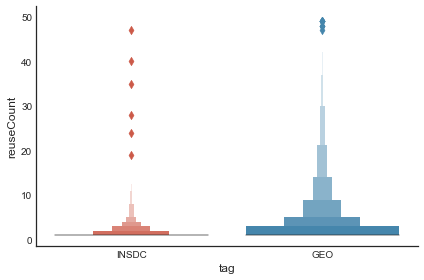

In [34]:
sns.catplot(x='tag', y='reuseCount', data=df,
            height=4,aspect=1.5,kind='boxen')

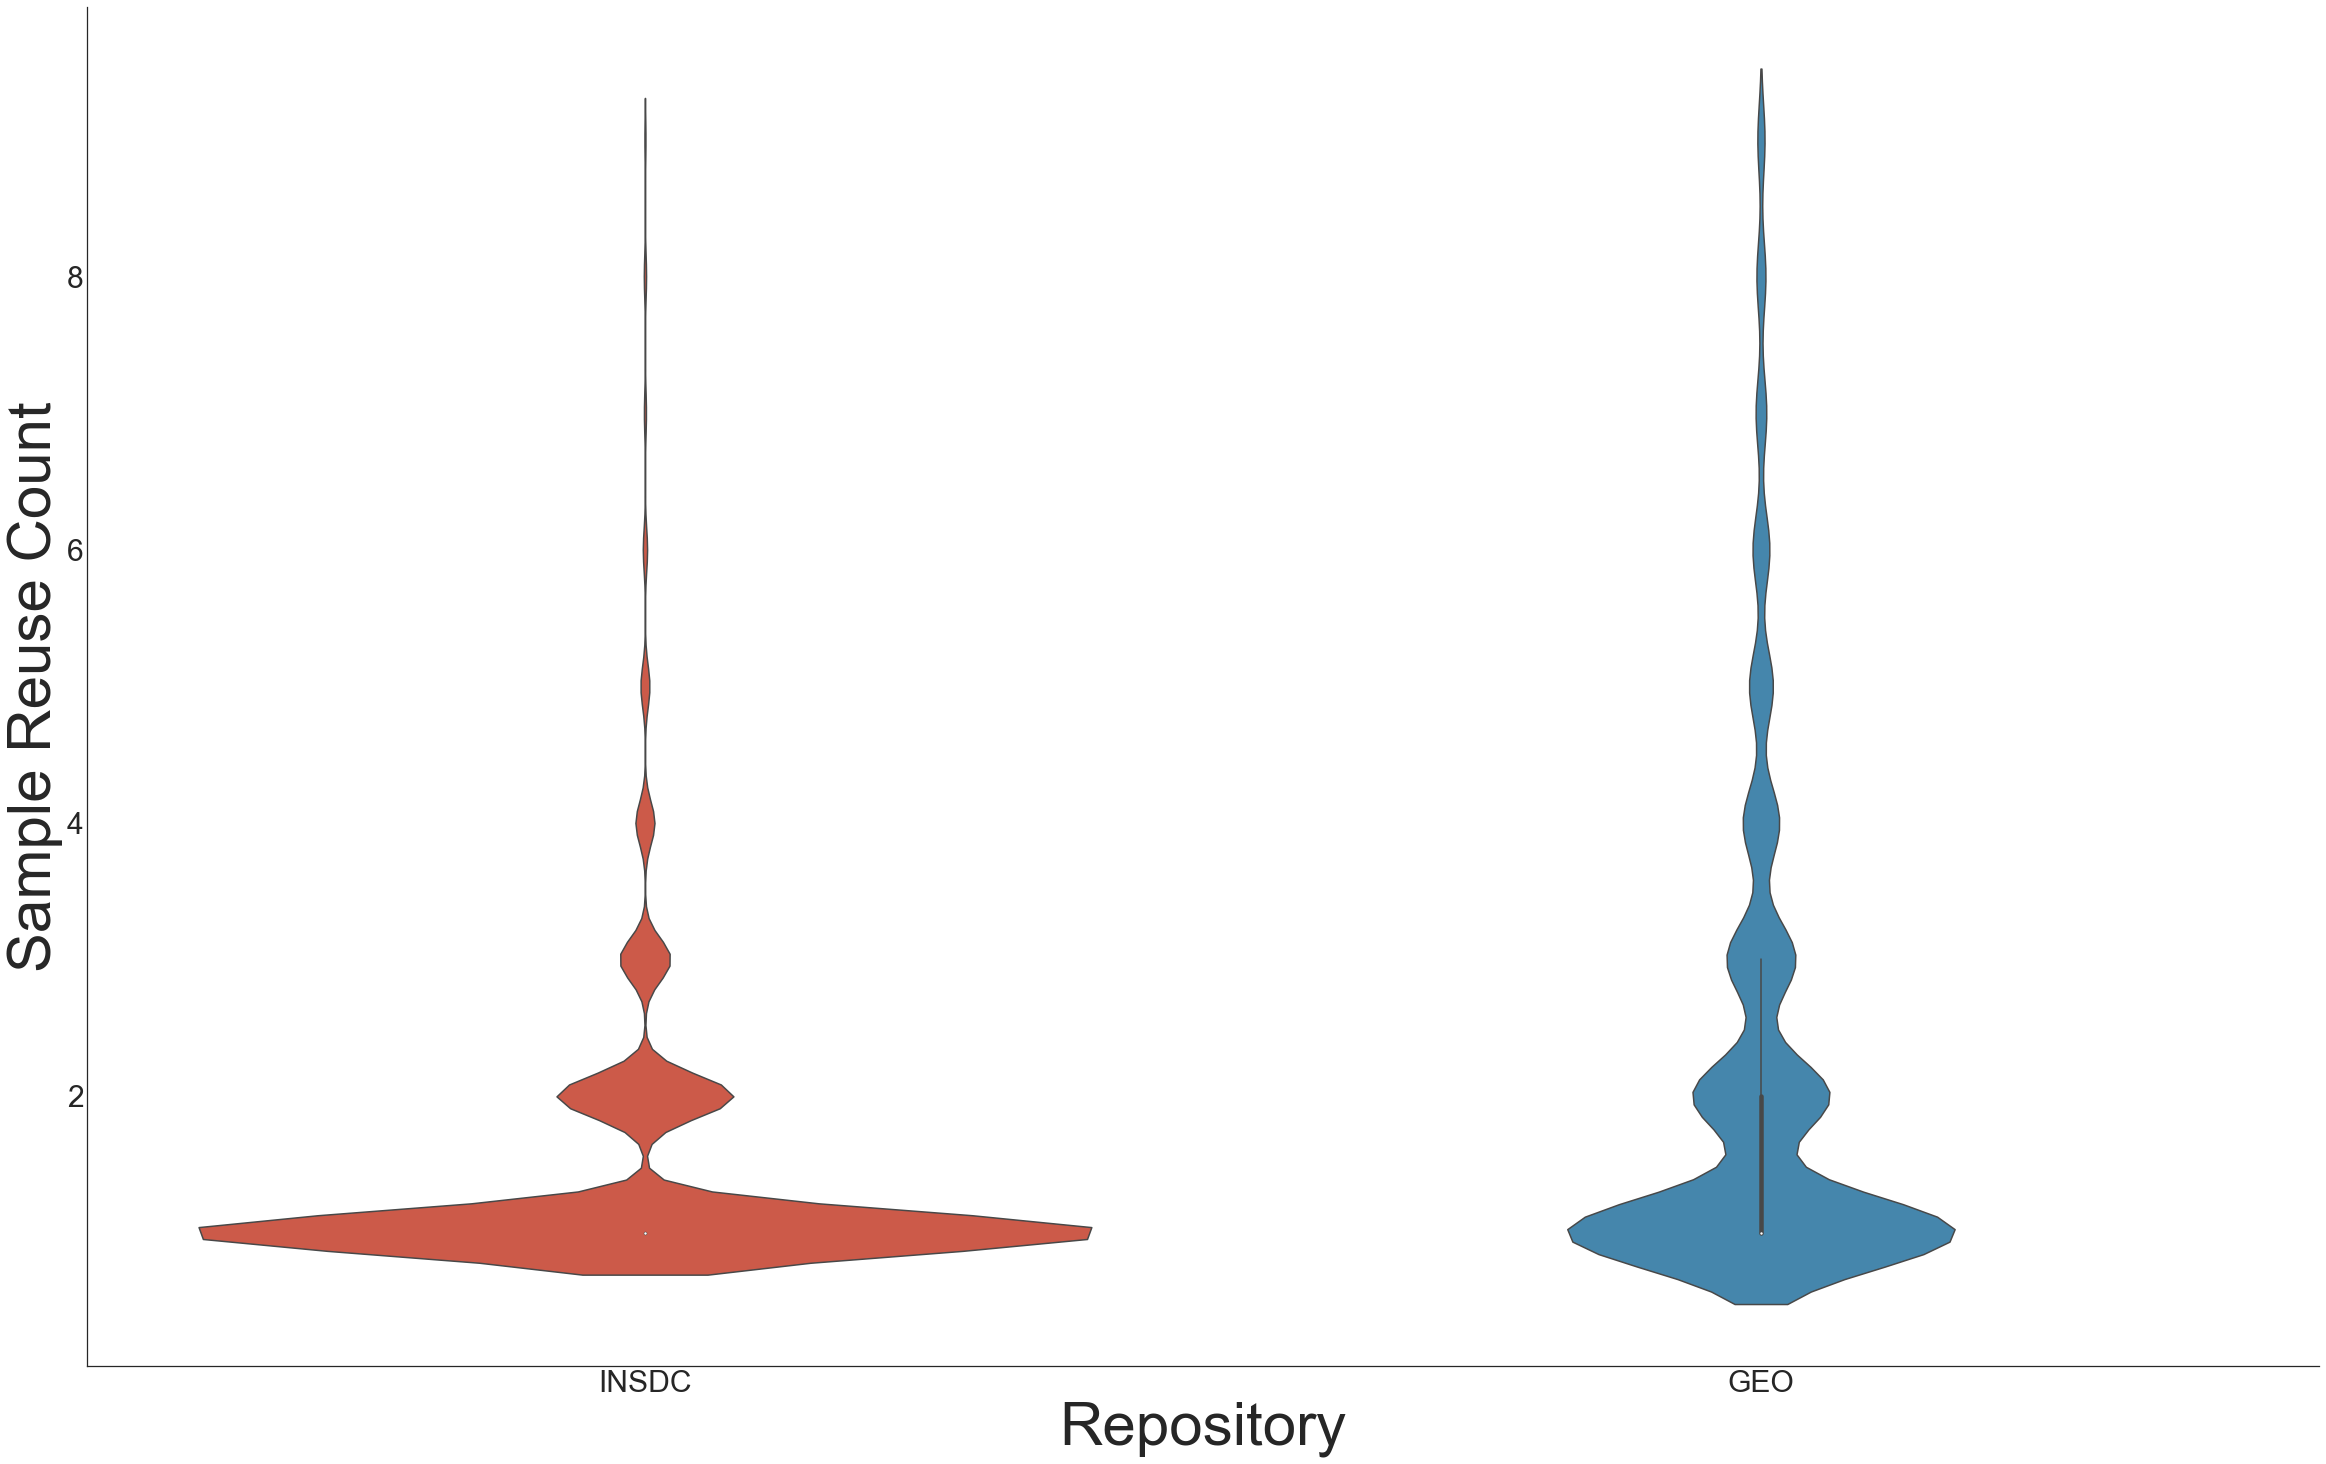

In [11]:
plt.style.use(['ggplot', 'seaborn-white'])
plt.figure(figsize=(40,25))
ax = sns.violinplot(data = df, x = 'tag', y = 'reuseCount')
sns.despine()

ax.set_xlabel("Repository", fontsize=60)
ax.set_ylabel("Sample Reuse Count", fontsize=60)

ax.tick_params(labelsize=30)

fig = ax.get_figure()

fig.savefig('violinplot.png', dpi = 200, bbox_inches = 'tight', transparent = True)